Lecture plan

1. Linear classification, logloss
2. Classification metrics

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from sklearn import datasets

data = datasets.load_iris()

In [78]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [81]:
df['target'] = data.target

In [85]:
df.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [93]:
df = df[df['target'] != 0]

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

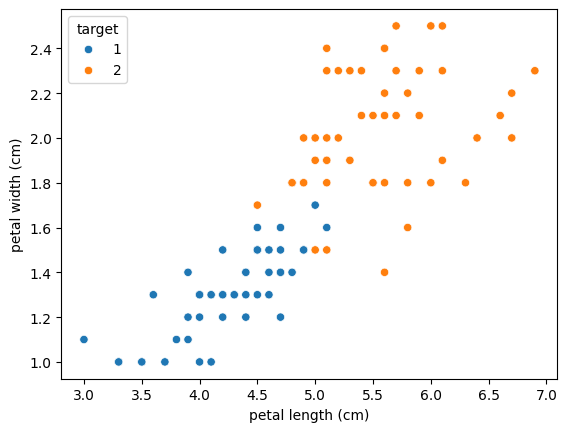

In [99]:
cols = df.columns
sns.scatterplot(df, x=cols[2], y=cols[3], hue='target', palette='tab10')

In [100]:
X = df.drop('target', axis=1)
y = df['target']

### 1.1. Regression as classifier

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

In [103]:
model.fit(X, y)

LinearRegression()

In [130]:
df['pred'] = model.predict(X)

/tmp/ipykernel_94844/3891794997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = model.predict(X)


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

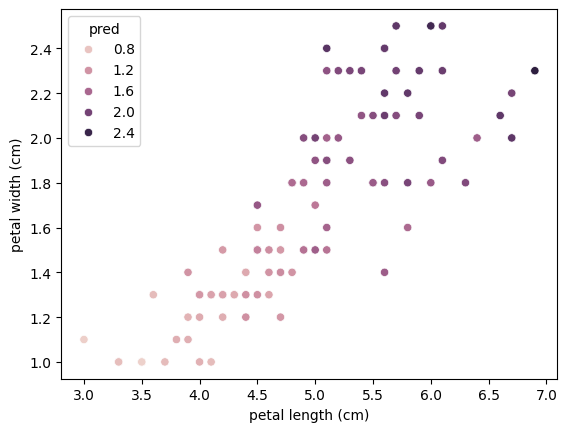

In [131]:
cols = df.columns
sns.scatterplot(df, x=cols[2], y=cols[3], hue='pred')

/tmp/ipykernel_94844/3938536498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pred'])


<Axes: xlabel='pred', ylabel='Density'>

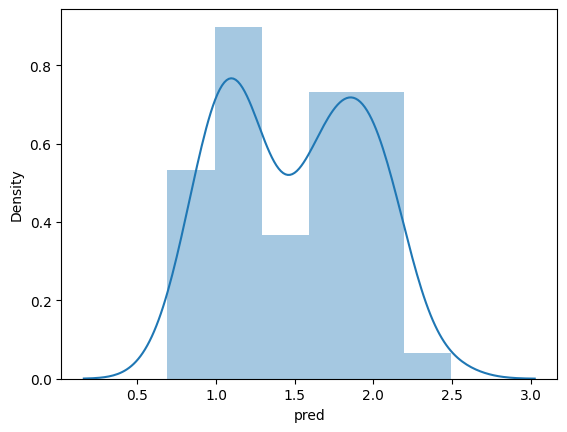

In [108]:
sns.distplot(df['pred'])

In [132]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred,pred_proba
50,7.0,3.2,4.7,1.4,1,0.986808,-1.0
51,6.4,3.2,4.5,1.5,1,1.095875,-1.0
52,6.9,3.1,4.9,1.5,1,1.182306,-1.0
53,5.5,2.3,4.0,1.3,1,1.220423,-1.0
54,6.5,2.8,4.6,1.5,1,1.237716,-1.0


In [133]:
model.predict([[1000, 1000, 1000, 1000]])

/home/ched/disk/Projects/ml/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([564.08044326])

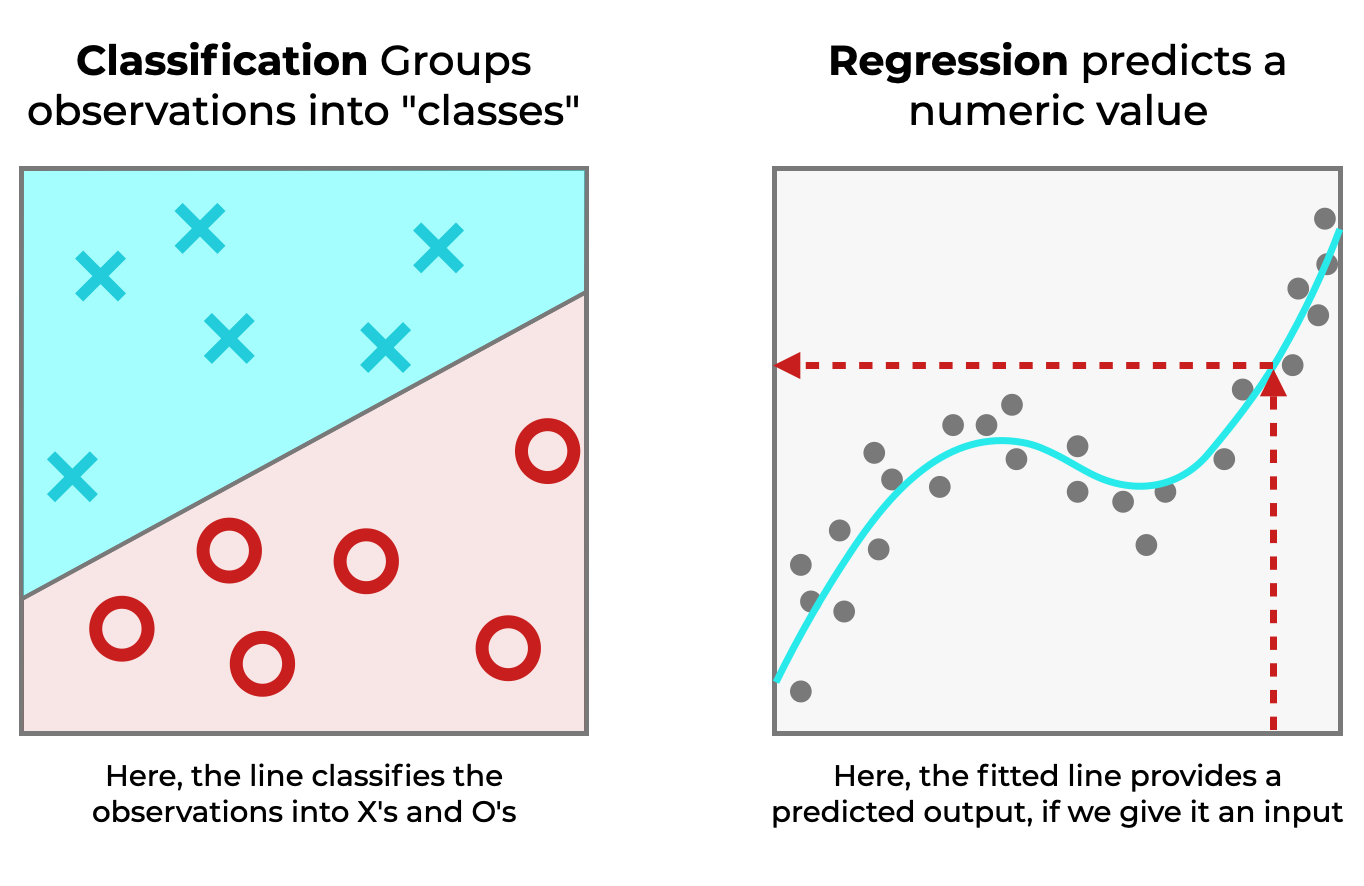

### 1.2. sign function for classification

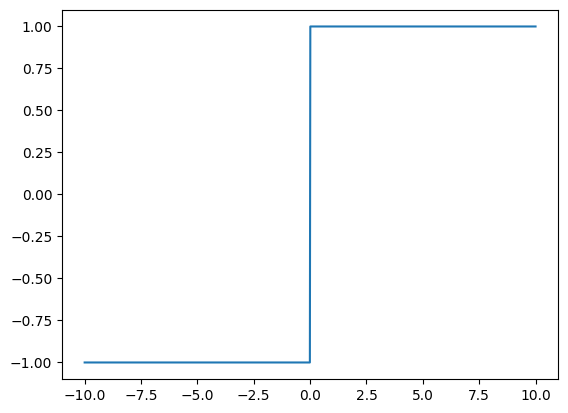

In [141]:
X1 = np.linspace(-10, 10, num=1000)
X2 = np.sign(X1)
plt.plot(X1, X2)

In [134]:
df['pred'].mean()

np.float64(1.4999999999999993)

In [135]:
df['pred_proba'] = np.sign(df['pred'] - 1.5)
df['pred_proba']

/tmp/ipykernel_94844/684908730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_proba'] = np.sign(df['pred'] - 1.5)


50    -1.0
51    -1.0
52    -1.0
53    -1.0
54    -1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: pred_proba, Length: 100, dtype: float64

In [122]:
(df['pred_proba'] + 1) / 2

50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: pred_proba, Length: 100, dtype: float64

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

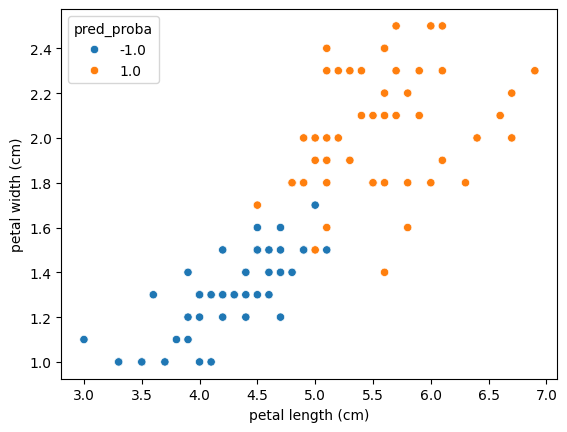

In [136]:
sns.scatterplot(df, x=cols[2], y=cols[3], hue='pred_proba', palette='tab10')

In [138]:
df['target']

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 100, dtype: int64

In [ ]:
model.predict([[1000, 1000, 1000, 1000]])

### 1.3. Sigmoid

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

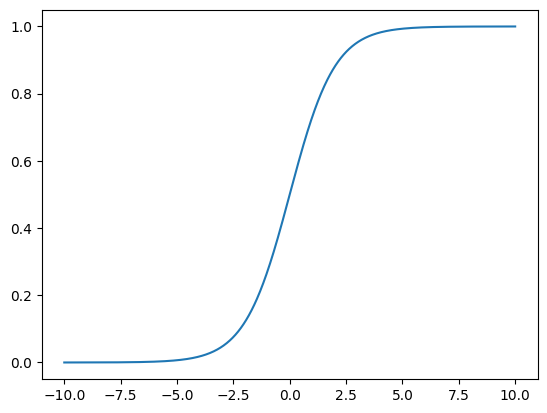

In [23]:
X1 = np.linspace(-10, 10, num=1000)
X2 = sigmoid(X1)
plt.plot(X1, X2)

In [123]:
sigmoid(df['pred'])

50     0.728457
51     0.749486
52     0.765362
53     0.772138
54     0.775166
         ...   
145    0.871449
146    0.857666
147    0.851724
148    0.877148
149    0.844333
Name: pred, Length: 100, dtype: float64

/tmp/ipykernel_94844/1795137730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sigmoid(df['pred']))


<Axes: xlabel='pred', ylabel='Density'>

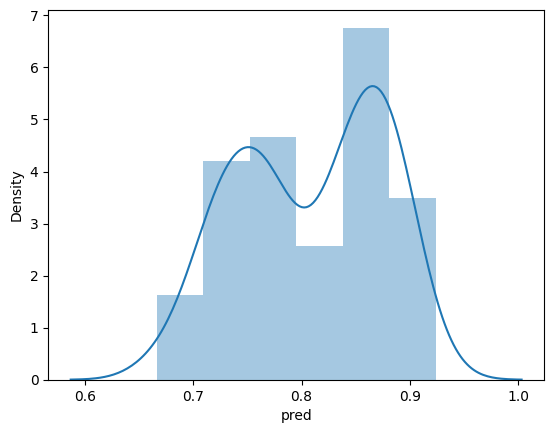

In [124]:
sns.distplot(sigmoid(df['pred']))

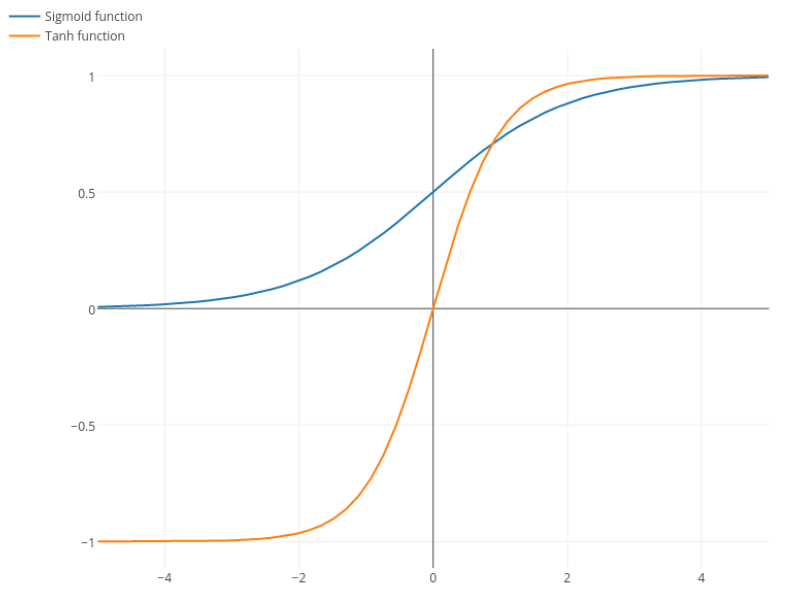

In [125]:
np.tanh(df['pred'])

50     0.755998
51     0.799013
52     0.828177
53     0.839779
54     0.844803
         ...   
145    0.957406
146    0.946394
147    0.941169
148    0.961522
149    0.934252
Name: pred, Length: 100, dtype: float64

/tmp/ipykernel_94844/1172555844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.tanh(df['pred']))


<Axes: xlabel='pred', ylabel='Density'>

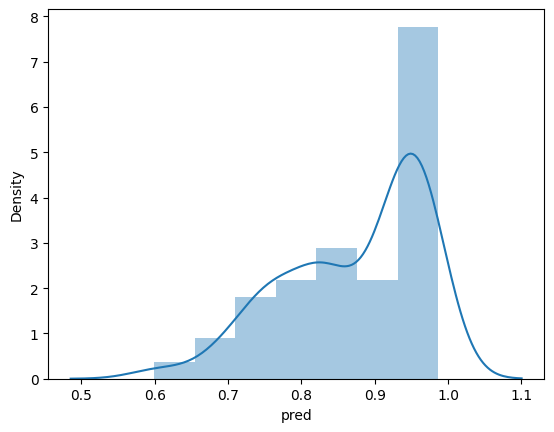

In [126]:
sns.distplot(np.tanh(df['pred']))

$$\frac{x}{1 + |x|}$$

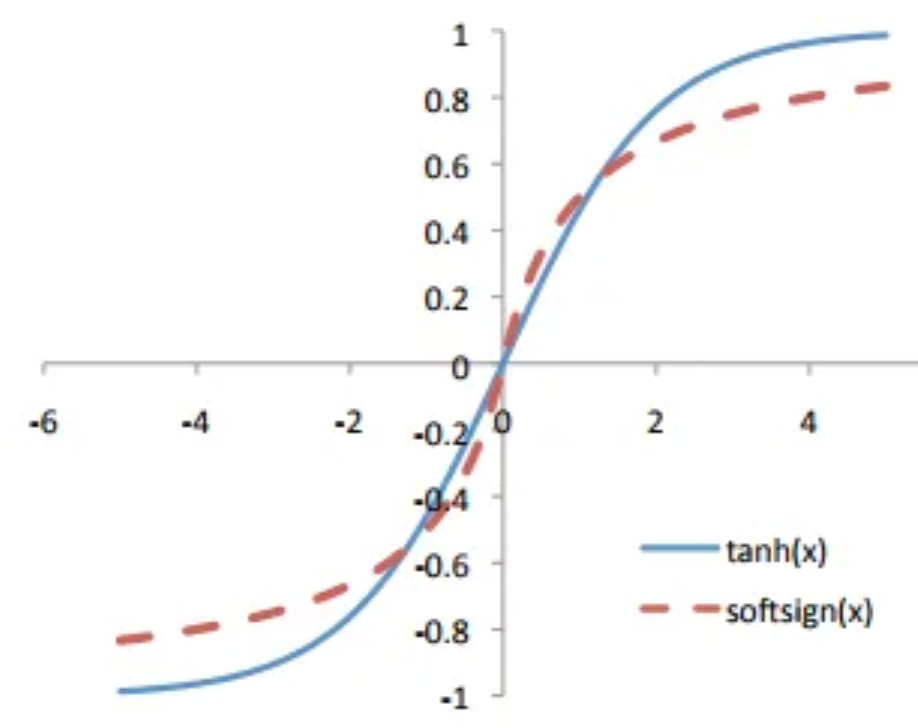

In [127]:
df['pred'] / (1 + df['pred'].abs())

50     0.496680
51     0.522872
52     0.541769
53     0.549635
54     0.553116
         ...   
145    0.656809
146    0.642351
147    0.636124
148    0.662810
149    0.628367
Name: pred, Length: 100, dtype: float64

/tmp/ipykernel_94844/1663227117.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pred'] / (1 + df['pred'].abs()))


<Axes: xlabel='pred', ylabel='Density'>

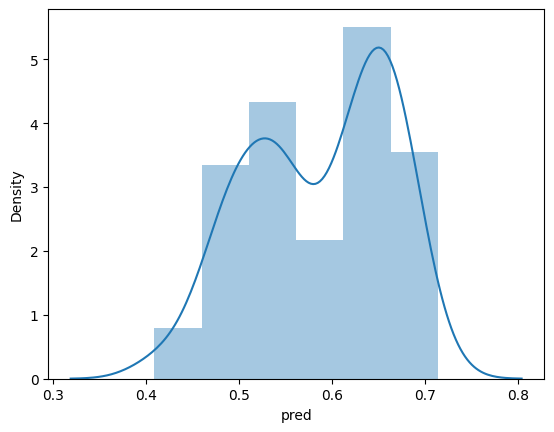

In [128]:
sns.distplot(df['pred'] / (1 + df['pred'].abs()))

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model = LogisticRegression()

In [144]:
model.fit(X, y)

LogisticRegression()

In [148]:
df['target'] -= 1

/tmp/ipykernel_94844/1033087334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] -= 1


In [159]:
W = model.coef_
W

array([[-0.39629303, -0.5122079 ,  2.93019683,  2.41380088]])

In [160]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [162]:
arr = X.values

In [174]:
result = 0

for i in range(4): 
    print(i)
    result += arr[0][i] * W[0][i].T

0
1
2
3


In [175]:
result

np.float64(12.73812989385779)

In [182]:
 arr.dot(W.T)

array([[12.73812989],
       [12.63124643],
       [13.65639944],
       [11.50103867],
       [13.08951997],
       [12.63077453],
       [13.4470744 ],
       [ 8.91231565],
       [12.5159097 ],
       [11.36340382],
       [ 9.66360887],
       [12.05277547],
       [10.62997268],
       [13.24845599],
       [ 9.9820059 ],
       [12.02917954],
       [13.05072243],
       [10.74614702],
       [13.22271293],
       [10.58318793],
       [14.43259226],
       [11.00715891],
       [14.20149999],
       [12.8169166 ],
       [11.71610926],
       [12.12002963],
       [13.31529134],
       [14.56265869],
       [12.94342601],
       [ 9.07887901],
       [10.38101834],
       [ 9.84661857],
       [10.64286783],
       [15.04536578],
       [13.12998104],
       [12.92870215],
       [13.14961868],
       [12.35608298],
       [11.39588352],
       [11.39859709],
       [12.27807494],
       [12.90421551],
       [10.9871083 ],
       [ 8.92390714],
       [11.84256557],
       [11

In [155]:
preds = model.predict_proba(X)[:, 1]
preds

array([0.15764007, 0.14396064, 0.31916247, 0.05151543, 0.2100701 ,
       0.14390249, 0.27548916, 0.00406322, 0.13032218, 0.04519076,
       0.00857397, 0.08617591, 0.02222525, 0.23765723, 0.01175076,
       0.08433579, 0.20370442, 0.02489506, 0.23302474, 0.02123097,
       0.50464221, 0.03208164, 0.44706836, 0.16838644, 0.06309658,
       0.09162166, 0.24997764, 0.5370907 , 0.18685191, 0.0047961 ,
       0.01741244, 0.01027814, 0.02250721, 0.6527939 , 0.216863  ,
       0.1846251 , 0.22021667, 0.11325256, 0.04661309, 0.04673383,
       0.10565166, 0.18096735, 0.03146482, 0.0041104 , 0.07099812,
       0.04714975, 0.06217979, 0.06794742, 0.00188891, 0.04948534,
       0.99340436, 0.80763907, 0.97321638, 0.91355791, 0.97766369,
       0.99570418, 0.41410253, 0.98223703, 0.95213295, 0.99181653,
       0.75815903, 0.85606757, 0.92687343, 0.82129898, 0.93024257,
       0.92360884, 0.87373265, 0.99605287, 0.99906393, 0.58735629,
       0.96971513, 0.75363989, 0.99616697, 0.60089024, 0.95309

In [156]:
((df['target'] - preds) ** 2 ).mean()

np.float64(0.04071693824787912)

In [185]:
mse_loss + np.linalg.norm(model.coef_)

np.float64(3.8512197101934587)

In [27]:
# sns.distplot(sigmoid(np.random.normal(0, 1, size=1000)))

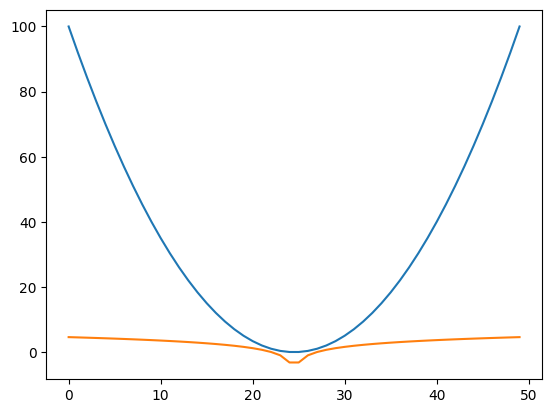

In [189]:
plt.plot(np.linspace(-10, 10) ** 2)
plt.plot(np.log(np.linspace(-10, 10) ** 2))